<a href="https://colab.research.google.com/github/CateMerfeld/class_work/blob/main/Copy_of_Day_78_Lecture_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [30]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [31]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [32]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [33]:
# Answer below
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [34]:
# Answer below
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [35]:
# Answer below:
sgd = SGD(lr=.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [36]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 27ms/step - loss: 0.6916 - accuracy: 0.5090 - val_loss: 0.6646 - val_accuracy: 0.6348
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6666 - accuracy: 0.6275 - val_loss: 0.6589 - val_accuracy: 0.6348
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.6135 - val_loss: 0.6620 - val_accuracy: 0.6348
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6690 - accuracy: 0.6135 - val_loss: 0.6565 - val_accuracy: 0.6348
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.6158 - val_loss: 0.6606 - val_accuracy: 0.6348
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6686 - accuracy: 0.6122 - val_loss: 0.6568 - val_accuracy: 0.6348
Epoch 7/50
8/8 [==============================] - 0s 28ms/step - loss: 0.6692 - accuracy: 0.6094 - val_loss: 0.6591 - val_accuracy: 0.6348
Epoch 8/50
8/8 [================

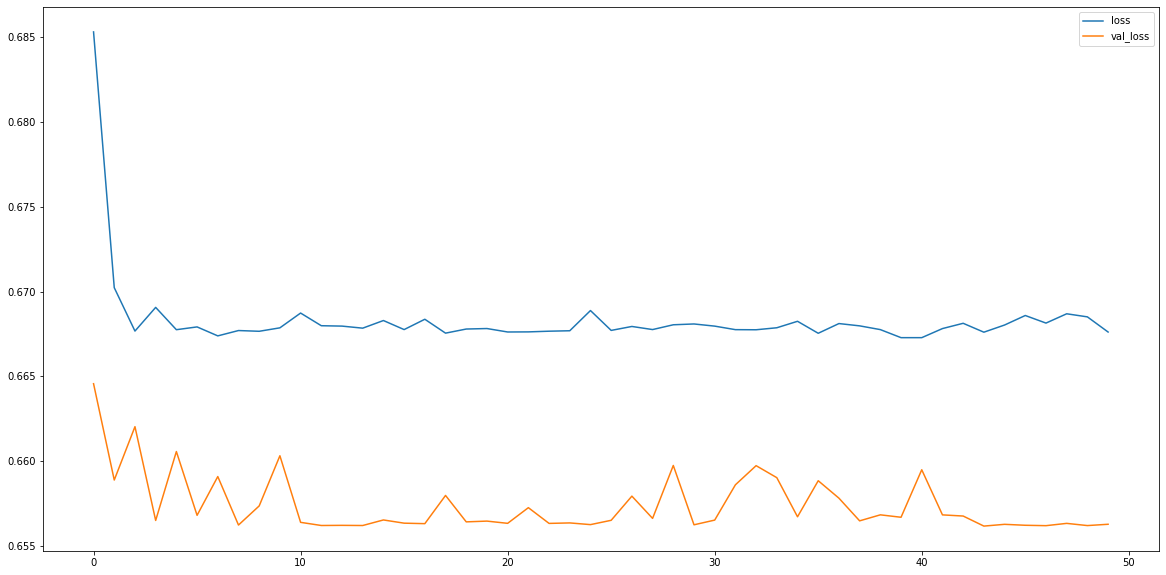

In [37]:
df = pd.DataFrame(history.history)
df[['loss', 'val_loss']].plot(figsize=(20,10))
plt.show()

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [38]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=500)


Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6091
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6199
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6202
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.6029
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6043
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6140
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6176
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6038
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5902
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6230
Epoch 11/500
8/8 [===========

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [39]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=200, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.6674 - accuracy: 0.6101
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.6158
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6638 - accuracy: 0.6176
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6063
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6186
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6168
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6041
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6068
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6243
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6106
Epoch 11/200
4/4 [===========

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [40]:
# Answer below
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [41]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6204
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6276
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5990
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6423
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6332
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6143
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6169
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.6197
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6152
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6022
Epoch 11/200
9/9 [===========

Define a new SGD optimizer with a learning rate of 0.001

In [42]:
# Answer below:
sgd = SGD(learning_rate=.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [43]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6119
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6031
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6300
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6150
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6181
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6226
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6076
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6009
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.6328
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6177
Epoch 11/200
9/9 [===========

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [45]:
model.predict_classes(X_train)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

`.flatten()`